In [2]:
import numpy as np
import SRC.EDA as EDA
from sklearn.cluster import SpectralClustering



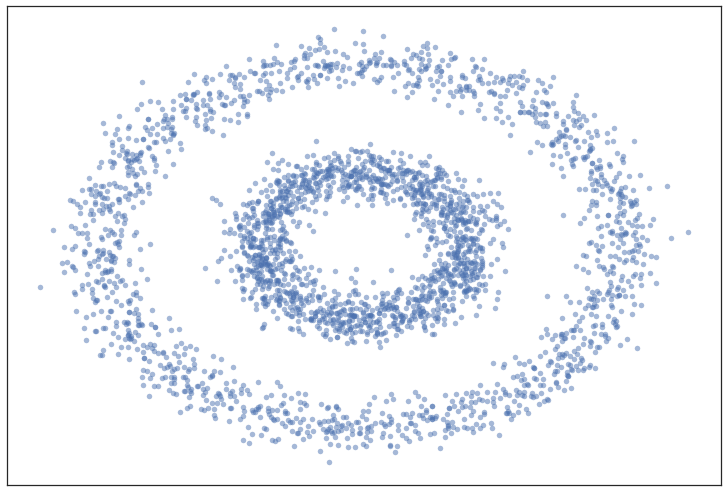

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 3000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.4,noise=.075)
X,y= noisy_circles
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
EDA.visualise_2D(X.T[0],X.T[1])

In [4]:
spectral = SpectralClustering(n_clusters=2,affinity="nearest_neighbors")
labels_circ = spectral.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


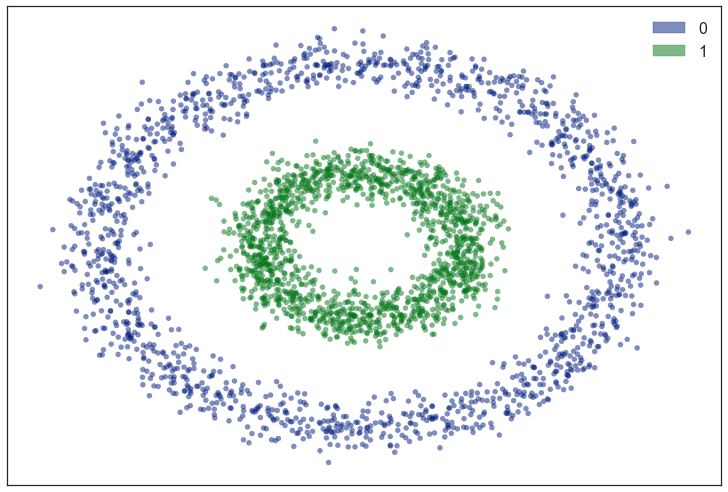

In [5]:
EDA.visualise_2D(X.T[0],X.T[1],labels_circ)


In [6]:
spectral_rbf = SpectralClustering(n_clusters=2,affinity="rbf")
labels_circ_1 = spectral_rbf.fit_predict(X)

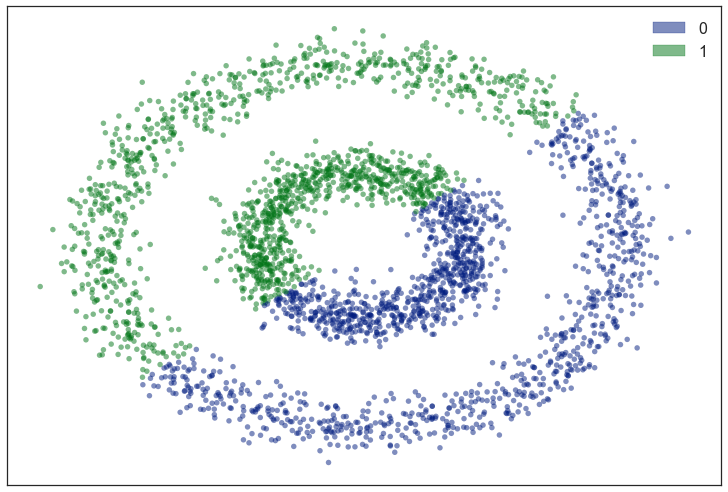

In [7]:
EDA.visualise_2D(X.T[0],X.T[1],labels_circ_1)

In [8]:
from sklearn import metrics

In [9]:
print(metrics.adjusted_mutual_info_score(y,labels_circ))
print(metrics.adjusted_rand_score(labels_pred=labels_circ,labels_true=y))
print(metrics.completeness_score(labels_pred=labels_circ,labels_true=y))
print(metrics.homogeneity_completeness_v_measure(labels_pred=labels_circ,labels_true=y))

1.0
1.0
1.0
(1.0, 1.0, 1.0)


In [10]:
print(metrics.adjusted_mutual_info_score(y,labels_circ_1))
print(metrics.adjusted_rand_score(labels_pred=labels_circ_1,labels_true=y))
print(metrics.completeness_score(labels_pred=labels_circ_1,labels_true=y))
print(metrics.homogeneity_completeness_v_measure(labels_pred=labels_circ_1,labels_true=y))

-0.000194447468822
-0.000269519527544
4.61702660405e-05
(4.6168785815872533e-05, 4.6170266040478472e-05, 4.6169525916311265e-05)


In [11]:
spectral_rbf.affinity_matrix_

array([[  1.00000000e+00,   4.06646944e-08,   1.34768014e-03, ...,
          3.06562125e-02,   2.05915201e-06,   1.83699242e-04],
       [  4.06646944e-08,   1.00000000e+00,   8.86082962e-02, ...,
          2.73824807e-03,   1.81212790e-01,   1.03558332e-01],
       [  1.34768014e-03,   8.86082962e-02,   1.00000000e+00, ...,
          3.99759613e-01,   1.56119239e-01,   4.64216424e-01],
       ..., 
       [  3.06562125e-02,   2.73824807e-03,   3.99759613e-01, ...,
          1.00000000e+00,   4.64642585e-02,   5.07413235e-02],
       [  2.05915201e-06,   1.81212790e-01,   1.56119239e-01, ...,
          4.64642585e-02,   1.00000000e+00,   1.98194617e-02],
       [  1.83699242e-04,   1.03558332e-01,   4.64216424e-01, ...,
          5.07413235e-02,   1.98194617e-02,   1.00000000e+00]])

In [12]:
spectral.affinity_matrix_

<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 35612 stored elements in Compressed Sparse Row format>

In [13]:
print(spectral.affinity_matrix_)

  (0, 1181)	0.5
  (0, 663)	0.5
  (0, 127)	0.5
  (0, 126)	0.5
  (0, 964)	1.0
  (0, 1222)	1.0
  (0, 1141)	1.0
  (0, 2667)	1.0
  (0, 1464)	1.0
  (0, 175)	1.0
  (0, 2697)	1.0
  (0, 75)	1.0
  (0, 109)	1.0
  (0, 0)	1.0
  (1, 26)	0.5
  (1, 2698)	0.5
  (1, 2719)	0.5
  (1, 2576)	0.5
  (1, 1120)	0.5
  (1, 1690)	0.5
  (1, 1949)	1.0
  (1, 32)	1.0
  (1, 288)	1.0
  (1, 1)	1.0
  (2, 2990)	0.5
  :	:
  (2997, 2213)	1.0
  (2997, 141)	1.0
  (2997, 2997)	1.0
  (2998, 1713)	0.5
  (2998, 1300)	0.5
  (2998, 1741)	0.5
  (2998, 71)	0.5
  (2998, 2704)	0.5
  (2998, 264)	0.5
  (2998, 2368)	1.0
  (2998, 845)	1.0
  (2998, 367)	1.0
  (2998, 892)	1.0
  (2998, 1809)	1.0
  (2998, 2998)	1.0
  (2999, 2356)	0.5
  (2999, 2211)	0.5
  (2999, 2113)	0.5
  (2999, 2535)	0.5
  (2999, 2718)	0.5
  (2999, 2306)	0.5
  (2999, 604)	0.5
  (2999, 2531)	0.5
  (2999, 78)	1.0
  (2999, 2999)	1.0


In [14]:
print(spectral.affinity_matrix_.toarray())

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


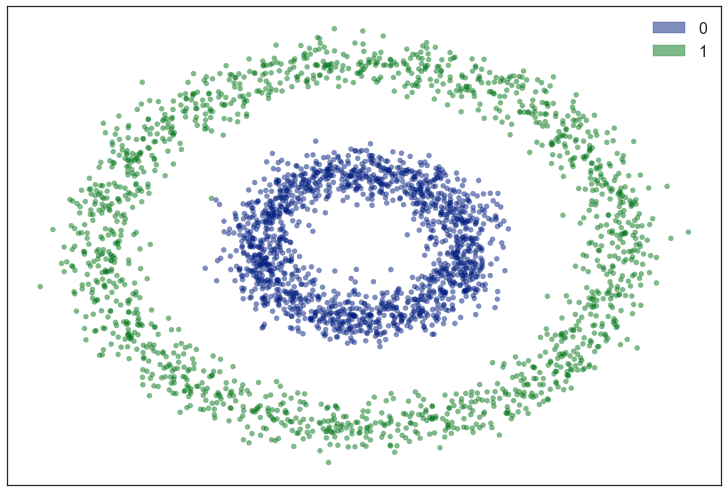

In [15]:
spectral_rbf2 = SpectralClustering(n_clusters=2,gamma=7.0,affinity="rbf")
labels_circ_12 = spectral_rbf2.fit_predict(X)
EDA.visualise_2D(X.T[0],X.T[1],labels_circ_12)

In [16]:
print(metrics.adjusted_mutual_info_score(y,labels_circ_12))
print(metrics.adjusted_rand_score(labels_pred=labels_circ_12,labels_true=y))
print(metrics.completeness_score(labels_pred=labels_circ_12,labels_true=y))
print(metrics.homogeneity_completeness_v_measure(labels_pred=labels_circ_12,labels_true=y))

0.996001063772
0.998666666519
0.996002345111
(0.9960020257940706, 0.99600234511134844, 0.99600218545268393)


In [17]:
aff 

NameError: name 'aff' is not defined